 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "", regex = True)
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "", regex = True)
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")
sp_tsx_history.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna()
sp_tsx_returns.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns = {"Close": "S&P TSX"})
sp_tsx_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis = "columns", join = "inner")
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

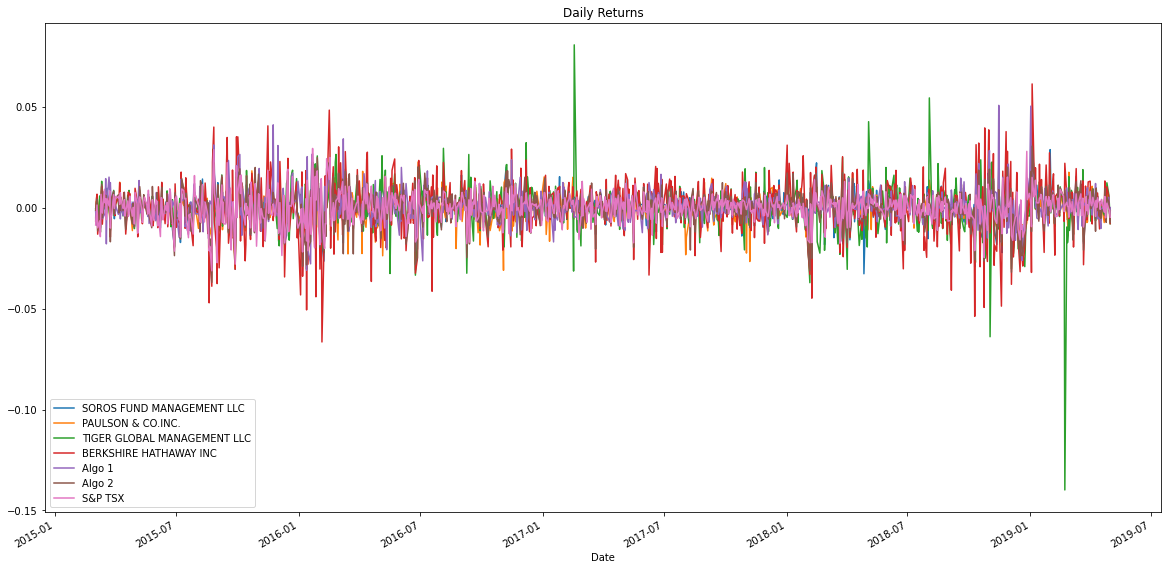

In [15]:
# Plot daily returns of all portfolios
daily_returns.plot(title = "Daily Returns", legend = True, figsize = (20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

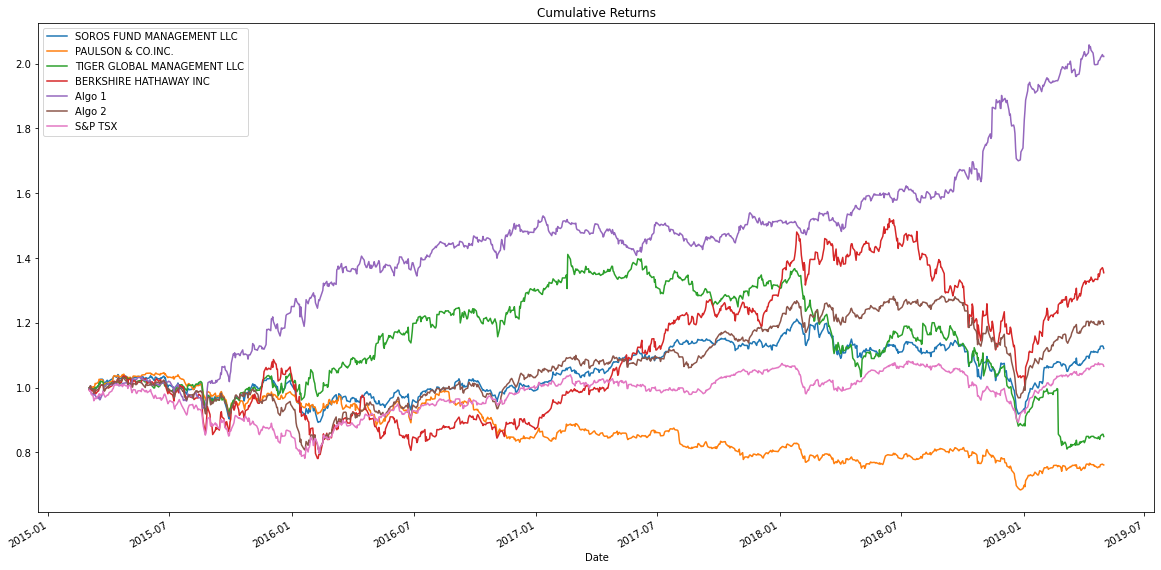

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(title = "Cumulative Returns", legend = True, figsize = (20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns'}>

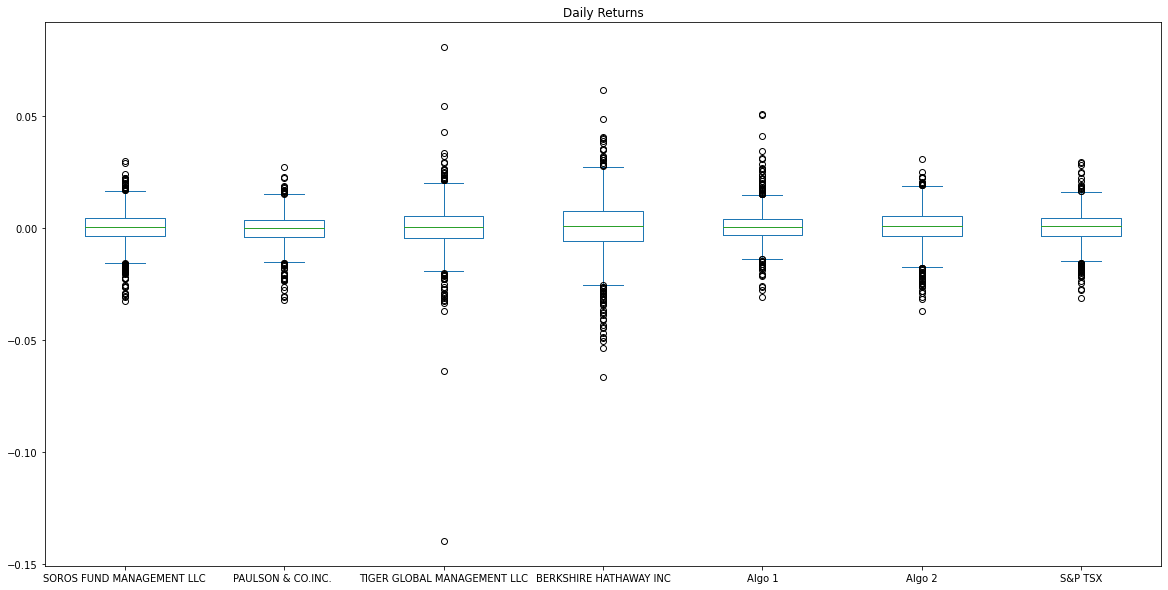

In [17]:
# Box plot to visually show risk
daily_returns.plot(kind = "box", title = "Daily Returns", legend = True, figsize = (20, 10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std["S&P TSX"]

0.007034167748577725

In [20]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

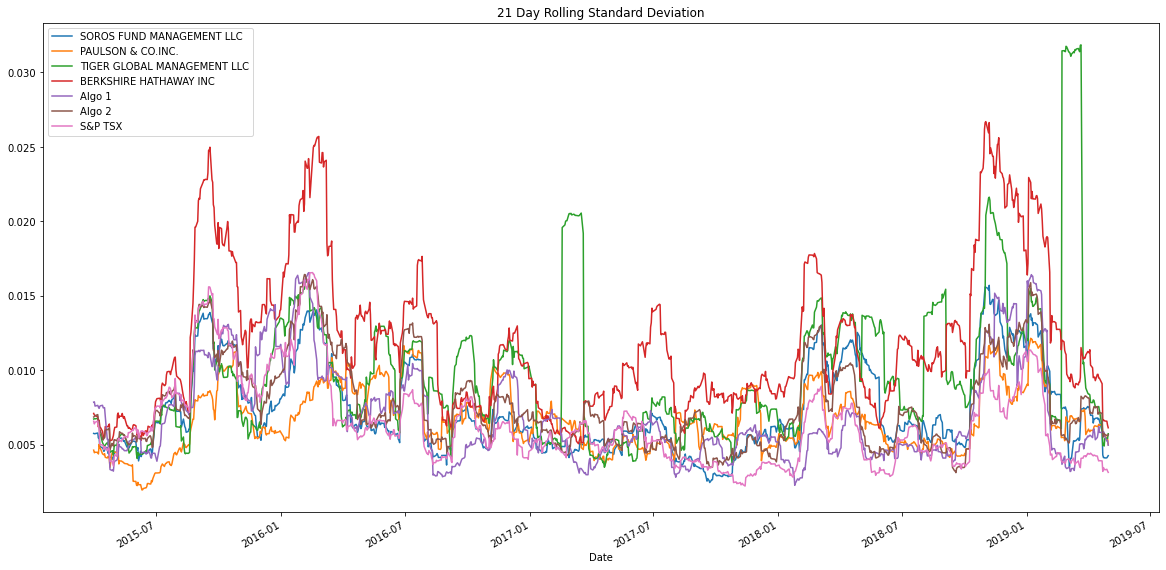

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_std.plot(title = "21 Day Rolling Standard Deviation", legend = True, figsize = (20, 10))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = daily_returns.corr()
# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [24]:
# Calculate covariance of a single portfolio
berk_covariance = daily_returns["BERKSHIRE HATHAWAY INC"].cov(daily_returns["S&P TSX"])
berk_covariance

5.027336077110012e-05

In [25]:
# Calculate variance of S&P TSX
sp_tsx_variance = daily_returns["S&P TSX"].var()
sp_tsx_variance

4.9479515915131015e-05

In [26]:
# Computing beta
berk_beta = berk_covariance / sp_tsx_variance
berk_beta

1.0160439091063609

<AxesSubplot:title={'center':'Besrkshire Hathaway Inc. Beta'}, xlabel='Date'>

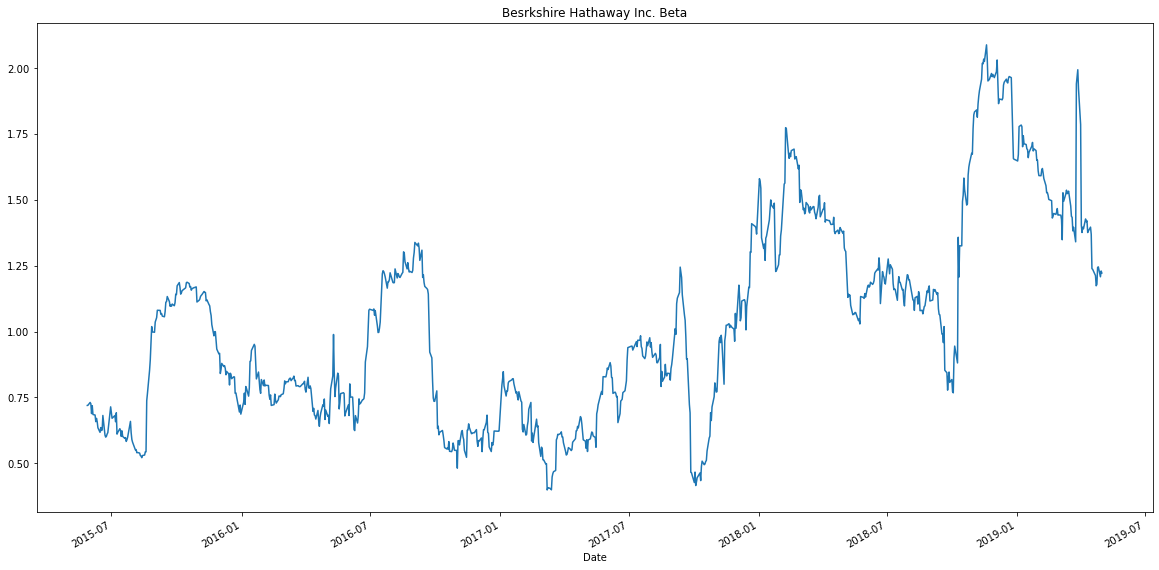

In [27]:
# Computing rolling beta trend
rolling_berk_covariance = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(daily_returns["S&P TSX"])
rolling_sp_tsx_variance = daily_returns["S&P TSX"].rolling(window = 60).var()
rolling_berk_beta = rolling_berk_covariance / rolling_sp_tsx_variance
# Plot beta trend
rolling_berk_beta.plot(title = "Besrkshire Hathaway Inc. Beta", figsize = (20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

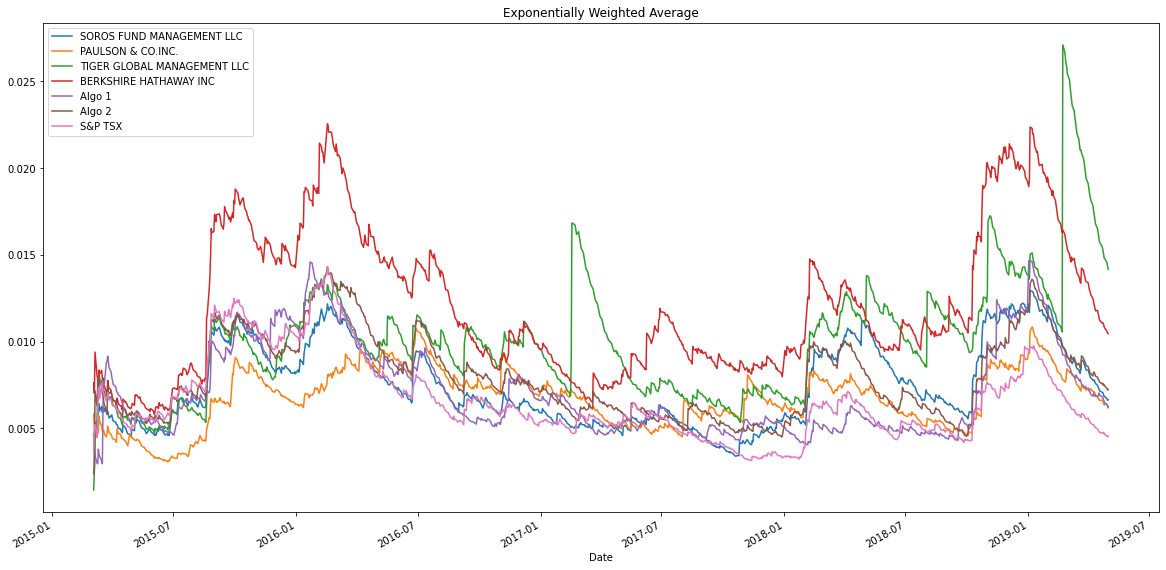

In [28]:
# Use `ewm` to calculate the rolling window
ewm_21 = daily_returns.ewm(halflife = 21).std()
ewm_21.plot(title = "Exponentially Weighted Average", legend = True, figsize = (20, 10))

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

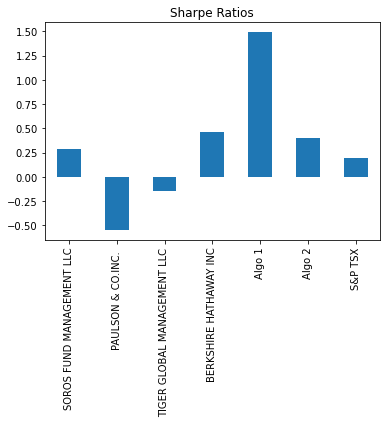

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(title = "Sharpe Ratios", kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Both algorithmic strategies outperform the market in terms of return to risk. Algorithmic strategy number 1 also outperforms all the whale portfolios, in particular it outperforms the best performing whale portfolio Berkshire Hathaway Inc by a factor of 3:1 in terms of return to risk.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
aapl_historical_path = Path("Resources/aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
aapl_historical.head()

,Close
Date,
2015-02-03 16:00:00,32.27
2015-03-03 16:00:00,32.34
2015-04-03 16:00:00,32.14
2015-05-03 16:00:00,31.60
2015-06-03 16:00:00,31.65


In [32]:
# Reading data from 2nd stock
amzn_historical_path = Path("Resources/amzn_historical.csv")
amzn_historical = pd.read_csv(amzn_historical_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
amzn_historical.head()

,Close
Date,
2015-02-03 16:00:00,385.66
2015-03-03 16:00:00,384.61
2015-04-03 16:00:00,382.72
2015-05-03 16:00:00,387.83
2015-06-03 16:00:00,380.09


In [33]:
# Reading data from 3rd stock
goog_historical_path = Path("Resources/goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
goog_historical.head()

,Close
Date,
2015-02-03 16:00:00,569.78
2015-03-03 16:00:00,572.07
2015-04-03 16:00:00,571.80
2015-05-03 16:00:00,573.75
2015-06-03 16:00:00,566.13


In [34]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([aapl_historical, amzn_historical, goog_historical], axis="columns", join="inner")

In [35]:
# Reset Date index
custom_portfolio.index = custom_portfolio.index.date

In [36]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = ["AAPL", "AMZN", "GOOG"]

In [37]:
# Calculate daily returns
custom_p_daily_returns = custom_portfolio.pct_change()
# Drop NAs
custom_p_daily_returns = custom_p_daily_returns.dropna()
# Display sample data
custom_p_daily_returns.head()

,AAPL,AMZN,GOOG
2015-03-03,0.002169,-0.002723,0.004019
2015-04-03,-0.006184,-0.004914,-0.000472
2015-05-03,-0.016801,0.013352,0.003410
2015-06-03,0.001582,-0.019957,-0.013281
2015-09-03,0.004423,-0.004025,0.002049


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
custom_p_weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
custom_p_returns = custom_p_daily_returns.dot(custom_p_weights)
# Display sample data
custom_p_returns.head()

2015-03-03    0.001155
2015-04-03   -0.003857
2015-05-03   -0.000013
2015-06-03   -0.010552
2015-09-03    0.000816
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns_with_custom = pd.concat([daily_returns, custom_p_returns], axis="columns", join="outer")
daily_returns_with_custom = daily_returns_with_custom.rename(columns = {0: "Custom"})
daily_returns_with_custom.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
2019-03-07,-0.007841,0.003632,-0.013210,-0.019471,-0.001560,-0.003298,-0.002210,NaN
2016-04-13,0.012289,0.005597,-0.004322,0.027532,0.006492,0.012362,0.006622,0.015139
2016-11-22,0.003405,-0.007093,0.006185,0.003282,0.004278,0.002494,0.004023,0.002113
2017-08-03,-0.003551,-0.023275,-0.004192,0.002081,0.000090,-0.004730,-0.004826,0.001909
2015-11-03,0.005853,0.002269,0.007130,0.014331,0.019469,0.000629,0.006408,-0.011237


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns_with_custom = daily_returns_with_custom.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
daily_std_with_custom = daily_returns_with_custom.std()
annualized_std_with_custom = daily_std_with_custom * np.sqrt(252)
annualized_std_with_custom = annualized_std_with_custom.sort_values(ascending=False)
annualized_std_with_custom

Custom                         0.223464
BERKSHIRE HATHAWAY INC         0.206698
TIGER GLOBAL MANAGEMENT LLC    0.176360
Algo 2                         0.133096
SOROS FUND MANAGEMENT LLC      0.126432
Algo 1                         0.120485
S&P TSX                        0.112542
PAULSON & CO.INC.              0.110906
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

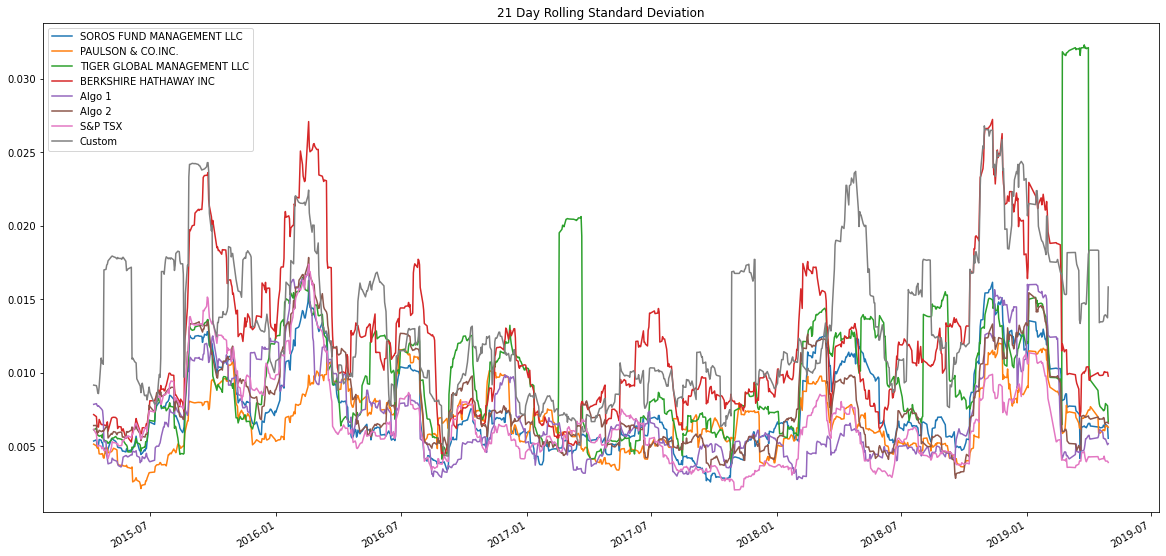

In [42]:
# Calculate rolling standard deviation
rolling_std_with_custom = daily_returns_with_custom.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_std_with_custom.plot(title = "21 Day Rolling Standard Deviation", legend = True, figsize = (20, 10))

### Calculate and plot the correlation

In [43]:
# Calculate and plot the correlation
correlation_with_custom = daily_returns_with_custom.corr()
correlation_with_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.704601,0.561884,0.756214,0.310442,0.832210,0.676650,0.432499
PAULSON & CO.INC.,0.704601,1.000000,0.441705,0.559444,0.270612,0.694663,0.517268,0.324607
TIGER GLOBAL MANAGEMENT LLC,0.561884,0.441705,1.000000,0.417861,0.157483,0.508501,0.440352,0.288303
BERKSHIRE HATHAWAY INC,0.756214,0.559444,0.417861,1.000000,0.293251,0.692888,0.563988,0.458550
Algo 1,0.310442,0.270612,0.157483,0.293251,1.000000,0.283501,0.308048,0.211828
Algo 2,0.832210,0.694663,0.508501,0.692888,0.283501,1.000000,0.740962,0.411478
S&P TSX,0.676650,0.517268,0.440352,0.563988,0.308048,0.740962,1.000000,0.392955
Custom,0.432499,0.324607,0.288303,0.458550,0.211828,0.411478,0.392955,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Custom Portfolio Beta'}>

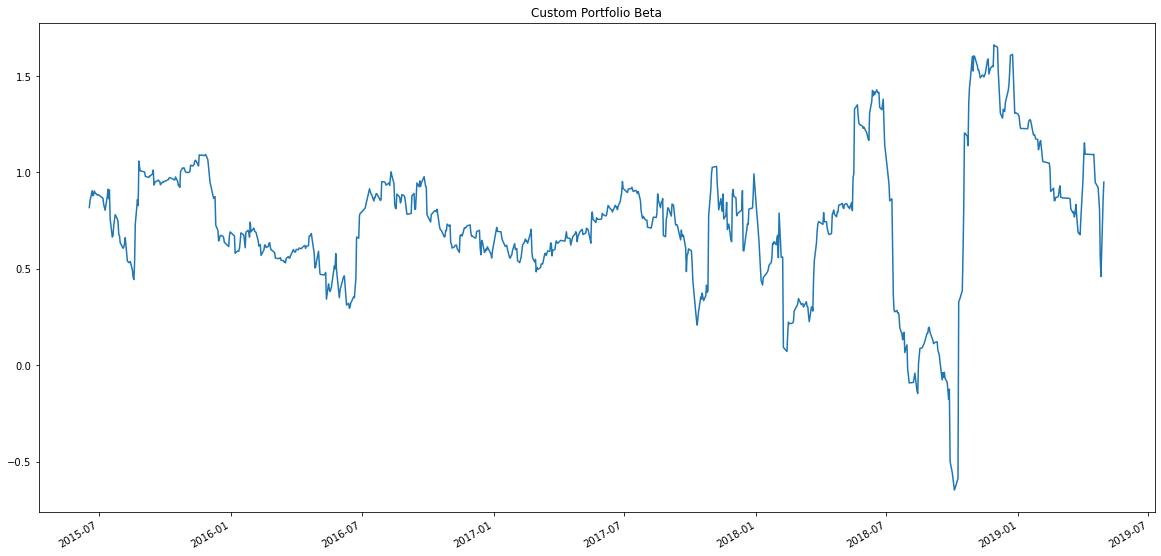

In [44]:
# Calculate and plot Beta
rolling_custom_covariance = daily_returns_with_custom["Custom"].rolling(window = 60).cov(daily_returns_with_custom["S&P TSX"])
rolling_sp_tsx_variance_with_custom = daily_returns_with_custom["S&P TSX"].rolling(window = 60).var()
rolling_custom_beta = rolling_custom_covariance / rolling_sp_tsx_variance_with_custom
rolling_custom_beta.plot(title = "Custom Portfolio Beta", figsize = (20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_with_custom = (daily_returns_with_custom.mean() * 252) / (daily_returns_with_custom.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

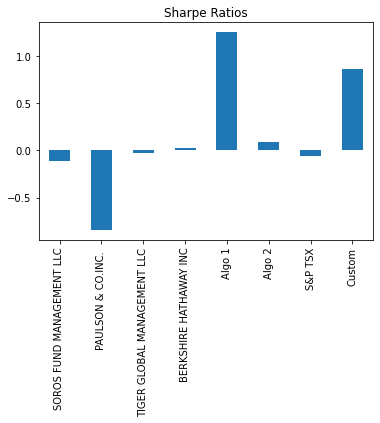

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_with_custom.plot(title = "Sharpe Ratios", kind = "bar")

### How does your portfolio do?

Write your answer here!

My custom portfolio with an equally weighted allocation to Apple, Amazon and Google stocks had the highest annualized standard deviation of all portfolios and therefore is the most volitile option. It had the second lowest correlation with the S&P 60 TSX and did not have a high correlation (above 0.5) with any of the other portfolios. Plotting Beta shows that my portfolio generally had been as or less volitile than the market for the first couple of years before becoming more volitile than the market in more recent years. Plotting the Sharpe Ratios revealed that my portfolio had the second best return to risk performance over the period for all portfolios.   